In [123]:
import cv2
import numpy as np
import tensorflow as tf

In [124]:
model = tf.keras.models.load_model('./saves/grape_berry_model.h5')
image = cv2.imread('./input2.jpg')
count = [
    0,0,0,0,0,0,0,0,0,0,0
]
cell_size_array=[
    60,62,64,66,68,70,72,74,76,78,80
]

In [125]:
with open('annotations.txt', 'r') as f:
    annotations = f.readlines()

In [126]:
index = -1
for size in cell_size_array:
    index = index + 1
    for annotation in annotations:
        x, y, w, h = map(int, annotation.strip().split())
        cell_size = size
        for i in range(y, y+h, cell_size):
            for j in range(x, x+w, cell_size):
                cell = image[i:i+cell_size, j:j+cell_size]
                cell = cv2.resize(cell, (150, 150))
                cell = cell / 255.0
                cell = np.expand_dims(cell, axis=0)
                prediction = model.predict(cell)
                if prediction[0][0] > 0.9999997:
                    count[index] = count[index] + 1
    err_rate = 0.75 * count[index]
    count[index] = count[index] + err_rate

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [127]:
from tabulate import tabulate

data = []

cell_formatted_string_array = []

for cell in cell_size_array:
    cell_formatted_string_array.append(str(cell)+'x'+str(cell))

for i in range(len(count)):
    data.append(
        [cell_formatted_string_array[i], count[i]]
    )

table = tabulate(data, headers=['Cell Size', 'Count'], tablefmt='grid')

print(table)

+-------------+---------+
| Cell Size   |   Count |
+=============+=========+
| 60x60       |   35    |
+-------------+---------+
| 62x62       |   33.25 |
+-------------+---------+
| 64x64       |   29.75 |
+-------------+---------+
| 66x66       |   31.5  |
+-------------+---------+
| 68x68       |   24.5  |
+-------------+---------+
| 70x70       |   26.25 |
+-------------+---------+
| 72x72       |   24.5  |
+-------------+---------+
| 74x74       |   19.25 |
+-------------+---------+
| 76x76       |   21    |
+-------------+---------+
| 78x78       |   22.75 |
+-------------+---------+
| 80x80       |   19.25 |
+-------------+---------+


In [131]:
avg_count = sum(count) / len(count)
avg_count = int(avg_count)
print("Estimated Visible Count = ",avg_count)

Estimated Visible Count =  26


In [133]:
import math

height = 0.8 * h
width = 0.8 * w

total_volume = (1/3) * math.pi * (width/2)**2 * height
visible_volume = (1/2) * (1/3) * math.pi * (width/2)**2 * height

total_count = avg_count + avg_count * \
    (total_volume / (total_volume-visible_volume))
total_count = round(total_count)    

print("Total count:", total_count)

Total count: 78


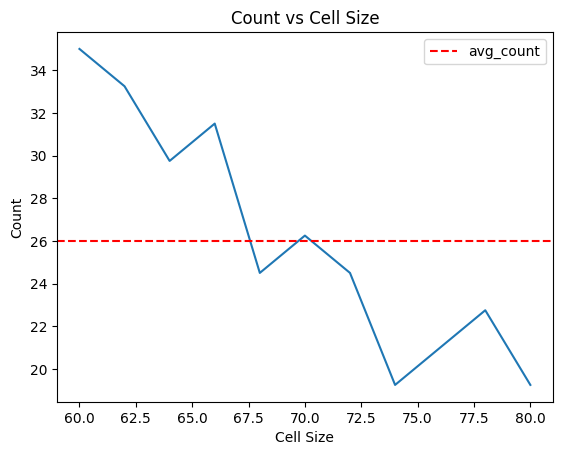

In [135]:
import matplotlib.pyplot as plt

plt.plot(cell_size_array, count)
plt.axhline(y=avg_count, color='r', linestyle='--', label='avg_count')
plt.xlabel('Cell Size')
plt.ylabel('Count')
plt.title('Count vs Cell Size')
plt.legend()
plt.show()
